<h1> <div align="center">Lending Club Loan Approval Prediction </div></h1>

---
---


<h2>Problem Statement:</h2> 


  
1. To predict whether or not a borrower will pay back their loan, given historical data on loans given out with information on whether or not the borrower defaulted (charge-off)
2. Assessing a new potential customer whether or not they are likely to pay back the loan in the future.
3. Create a Web interface where a user can input new customer details and get a prediction instantly.


&nbsp; 



**Data used**: [Click here to download](https://www.kaggle.com/hadiyad/lendingclub-data-sets/download)

**Solution by**: Praveen Samudrala in collaboration with Aditya Karanth.(https://github.com/Aditya-Karanth)


## **Project Planning :**
&nbsp;


### **Data Understanding**
- **Imports -** 
  - Contains all the imports necessary for reading data, visualizations and model buiding and evaluating.
- **Getting Data -** 
  - Connecting *Google drive* to *Google colab*.
  - Understanding nature of the data *.info()*, *.describe()*
  - Function to get information about a each feature.
  - Checking numerical and categorical features.

&nbsp;
### **Data Preparation**

- **Exploring Data**
  - Checking missing data using heatmaps.
  - Distribution of dependent variable
  - Visualization of different features to understand relations and distributions.
  - Understanding the correlation between features using heatmaps.

- **Data Preprocessing**
  - **Data Cleaning -**
    - Handling missing data for each feature using defined *function* and *median*.
    - Removing features with less information and unwanted features.

  - **Feature Engineering -**
    - Deriving numerical information from categorical features.
    - Removing features with same information and high correlation.
    - Converting all categorical features to numerical using *dummies* and dropping all original categorical features.

  - **Data Tranformation -**
    - Splitting data in to training and testing.

  - **Normalization -**
    - Scaling training and testing data using *MinMax Scaler*.

&nbsp;
### **Modeling**
- Creating the Sequential *ANN* model.
- Compiling and Fitting the created model with *Early Stopping* and *Tensor Board* and checking the model summary.

&nbsp;
### **Evaluation**
- **Predictions and Losses** -
  - Predictions on test set
  - Evaluation of model with classification report and confusion matrix.
  - Obtaining metrics like loss, accuracy, val_loss, val_accuracy from model
  - Plotting train v/s validation metrics of model.

- **Tensor Board**-
  - visualizing metrics on tensor board in colab.

- **New Customer Loan Repayment Prediction**
  - Training a model on whole dataset (X and y) without splitting.
  - Function "assess_customer" to assess new customers whether they payback loan or not.
  - Check model predictions on new customer.
  
&nbsp;

### **Inference function for Web App**

&nbsp;





# **Data Understanding**
---

## **Imports**


In [ ]:
# Basic Imports
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

# Visualization 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
matplotlib.rcParams['figure.figsize'] = (12,8)  

# Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
import tensorflow as tf
from tf.keras.models import Sequential
from tf.keras.layers import Dense,Dropout
from tf.keras.constraints import max_norm
from tf.keras.callbacks import EarlyStopping
print(tf.__version__)

from pickle import dump, load

# Evaluation
from sklearn.metrics import classification_report,confusion_matrix, f1_score


2.9.2


In [ ]:
tf.__version__

'2.5.0'

## **Getting Data**

In [ ]:
# Connecting Google Drive with Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Loading the dataset
df_info = pd.read_csv('lending_club_info.csv', index_col='LoanStatNew')
df = pd.read_csv('lending_club_loan_two.csv')

In [ ]:
# df_info contains description about all the features present in dataset(df)
# Target is loan_status
df_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
# Function to get information about a feature
def feature_info(col_name):
    return '{} : {}'.format(col_name,df_info.loc[col_name]['Description'])

# Info about Target ('loan_status')
feature_info('loan_status')

'loan_status : Current status of the loan'

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [ ]:
# Get numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.values
print('Numeric cols :',num_cols)

Numeric cols : ['loan_amnt' 'int_rate' 'installment' 'annual_inc' 'dti' 'open_acc'
 'pub_rec' 'revol_bal' 'revol_util' 'total_acc' 'mort_acc'
 'pub_rec_bankruptcies']


In [ ]:
# Get Non-numeric/categorical columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns.values
print('Categorical cols :',cat_cols)

Categorical cols : ['term' 'grade' 'sub_grade' 'emp_title' 'emp_length' 'home_ownership'
 'verification_status' 'issue_d' 'loan_status' 'purpose' 'title'
 'earliest_cr_line' 'initial_list_status' 'application_type' 'address']


# **Data Preparation**
---
- Exploring Data
- Data Preprocessing


## **Exploring Data**

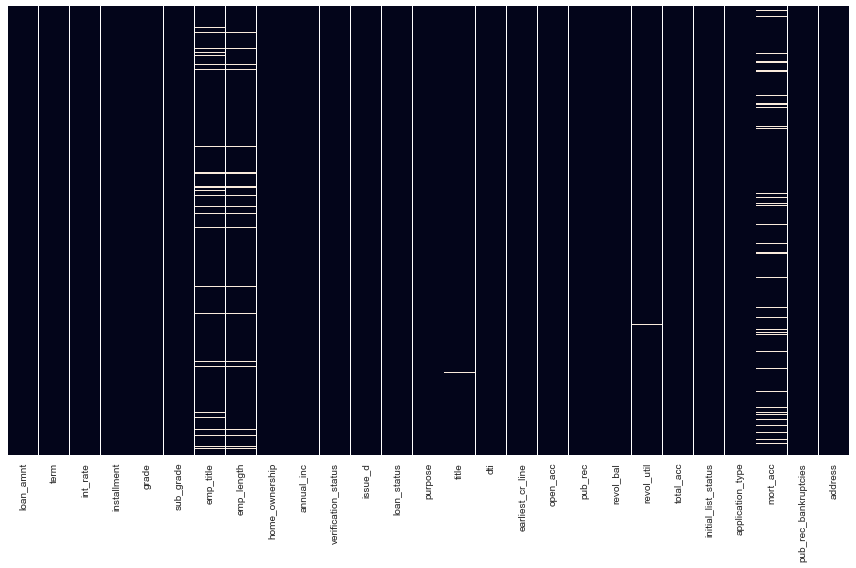

In [ ]:
# Check for missing data
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.tight_layout()

In [ ]:
# Number of missing values
print(df.isnull().sum().sort_values(ascending=False))

mort_acc                37795
emp_title               22927
emp_length              18301
title                    1755
pub_rec_bankruptcies      535
revol_util                276
loan_amnt                   0
dti                         0
application_type            0
initial_list_status         0
total_acc                   0
revol_bal                   0
pub_rec                     0
open_acc                    0
earliest_cr_line            0
purpose                     0
term                        0
loan_status                 0
issue_d                     0
verification_status         0
annual_inc                  0
home_ownership              0
sub_grade                   0
grade                       0
installment                 0
int_rate                    0
address                     0
dtype: int64


In [ ]:
# Number of missing %
print(round((df.isnull().mean()*100).sort_values(ascending=False),2))

mort_acc                9.54
emp_title               5.79
emp_length              4.62
title                   0.44
pub_rec_bankruptcies    0.14
revol_util              0.07
loan_amnt               0.00
dti                     0.00
application_type        0.00
initial_list_status     0.00
total_acc               0.00
revol_bal               0.00
pub_rec                 0.00
open_acc                0.00
earliest_cr_line        0.00
purpose                 0.00
term                    0.00
loan_status             0.00
issue_d                 0.00
verification_status     0.00
annual_inc              0.00
home_ownership          0.00
sub_grade               0.00
grade                   0.00
installment             0.00
int_rate                0.00
address                 0.00
dtype: float64


<AxesSubplot:xlabel='loan_status', ylabel='count'>

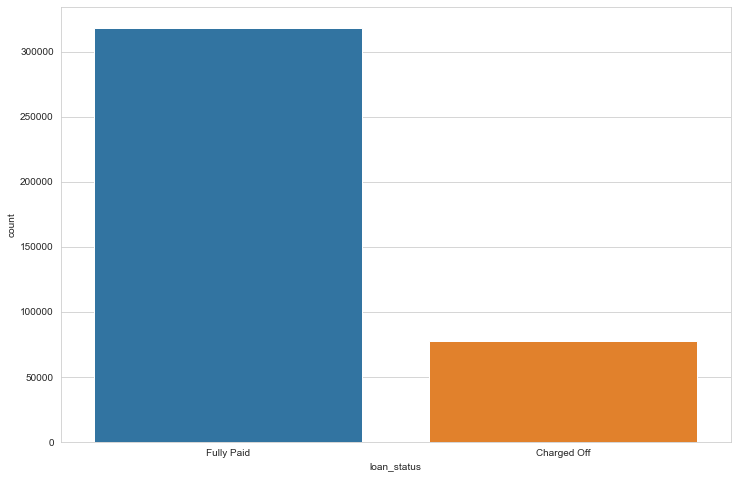

In [ ]:
# Countplot of Target (loan_status)
sns.countplot(df['loan_status'])

In [ ]:
# From above graph we have imbalanced data, where 80% of data points are Fully Paid and 20% charged off
100*df['loan_status'].value_counts()/(df['loan_status'].count())

Fully Paid     80.387092
Charged Off    19.612908
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='loan_amnt'>

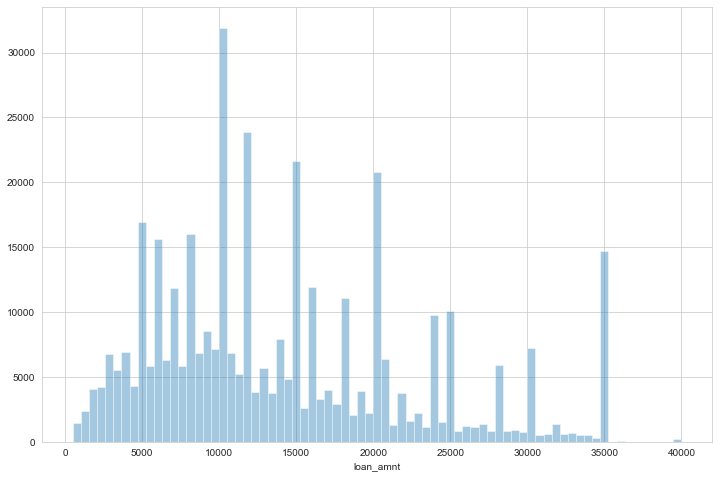

In [ ]:
# Histogram of loan_amnt
sns.distplot(df['loan_amnt'], kde=False, bins=75)

<AxesSubplot:>

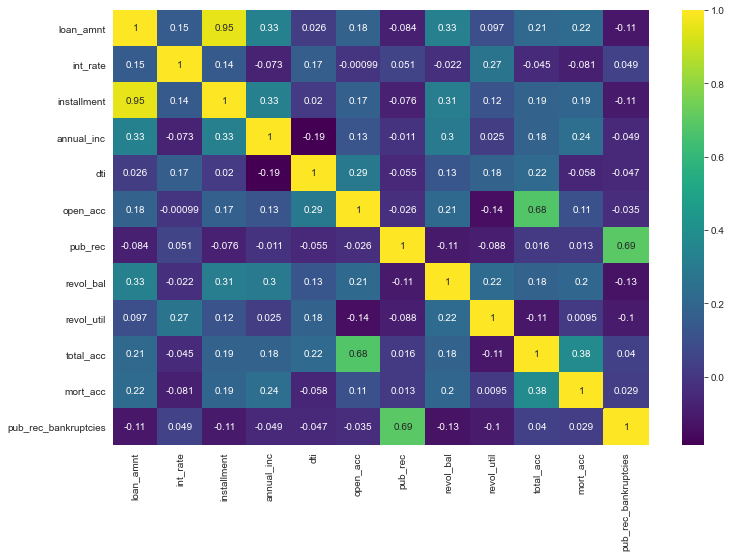

In [ ]:
# Correlation plot
sns.heatmap(df.dropna().corr(), annot=True, cmap='viridis')

In [ ]:
# "installment" almost perfect correlation with the "loan_amount" feature
print(feature_info('installment'),'\n', feature_info('loan_amnt'))

installment : The monthly payment owed by the borrower if the loan originates. 
 loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

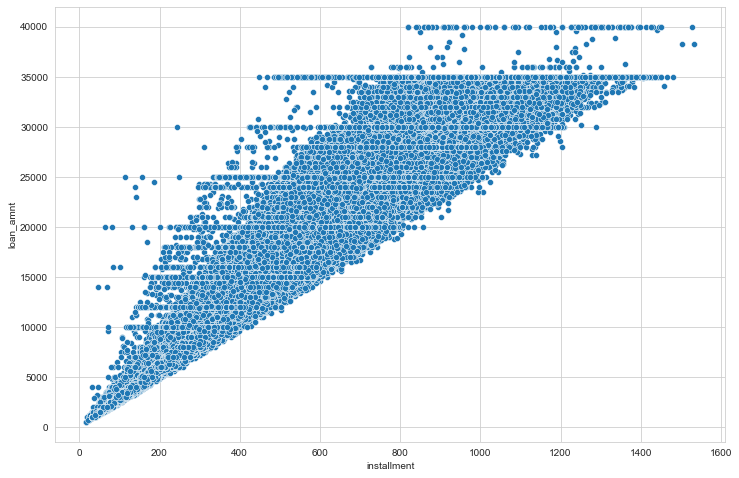

In [ ]:
# As loan_amnt amount increases installments increases
sns.scatterplot('installment', 'loan_amnt', data=df)

total_acc : The total number of credit lines currently in the borrower's credit file 
 open_acc : The number of open credit lines in the borrower's credit file. 



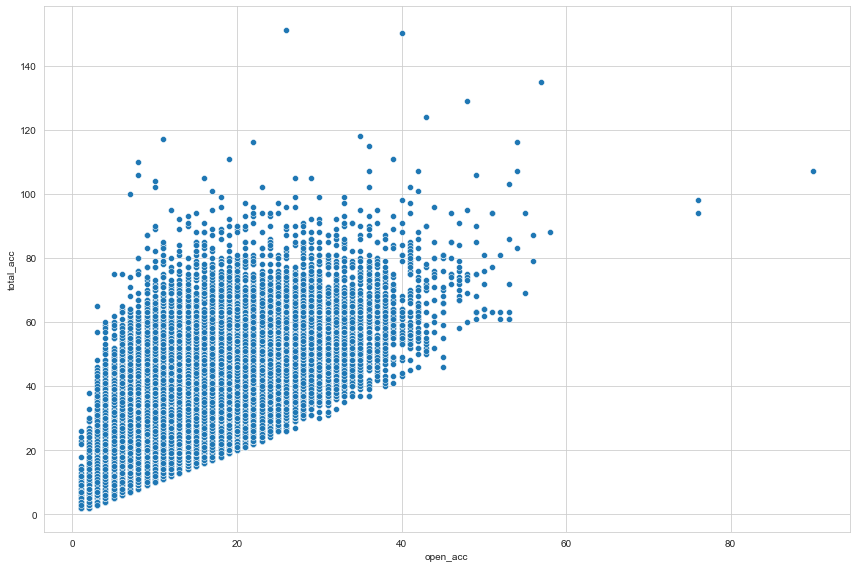

In [ ]:
# open credit lines v/s total number of credit lines in the borrower's credit file.
print(feature_info('total_acc'), '\n',feature_info('open_acc'),'\n')
sns.scatterplot('open_acc', 'total_acc', data=df.dropna())
plt.tight_layout()

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

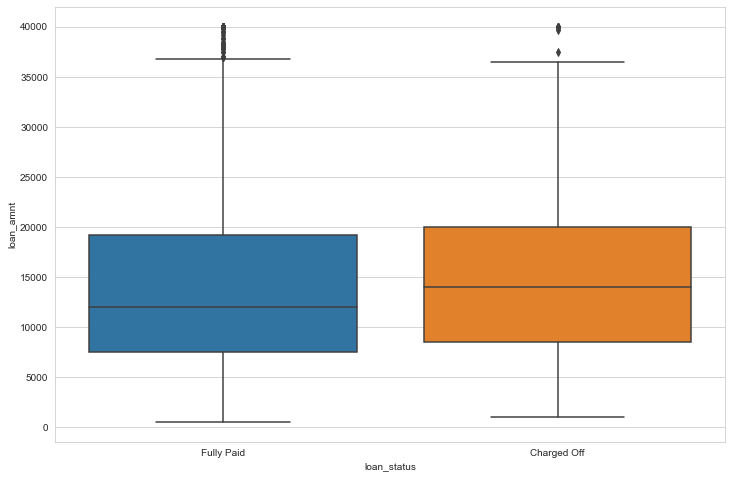

In [ ]:
# Boxplot showing the relationship between the loan_status and the loan_amnt
sns.boxplot('loan_status','loan_amnt',data=df)

In [ ]:
# summary statistics for the loan amount, grouped by the loan_status.
df.groupby('loan_status')['loan_amnt'].describe()
# Charged Off loans "loan amount" is a bit higher than Fully Paid loans

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [ ]:
# Explore the "grade" column that LendingClub attributes to the loans.
print(np.sort(df['grade'].unique()))

['A' 'B' 'C' 'D' 'E' 'F' 'G']


In [ ]:
# Explore the "sub_grade" column that LendingClub attributes to the loans.
print(np.sort(df['sub_grade'].unique()))

['A1' 'A2' 'A3' 'A4' 'A5' 'B1' 'B2' 'B3' 'B4' 'B5' 'C1' 'C2' 'C3' 'C4'
 'C5' 'D1' 'D2' 'D3' 'D4' 'D5' 'E1' 'E2' 'E3' 'E4' 'E5' 'F1' 'F2' 'F3'
 'F4' 'F5' 'G1' 'G2' 'G3' 'G4' 'G5']


<AxesSubplot:xlabel='grade', ylabel='count'>

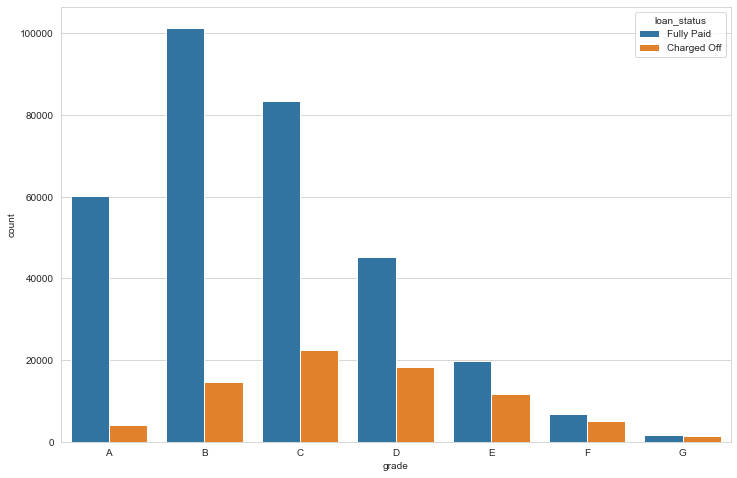

In [ ]:
# Countplot of grade per loan_status. 
sns.countplot(df['grade'].sort_values(), hue=df['loan_status'])

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

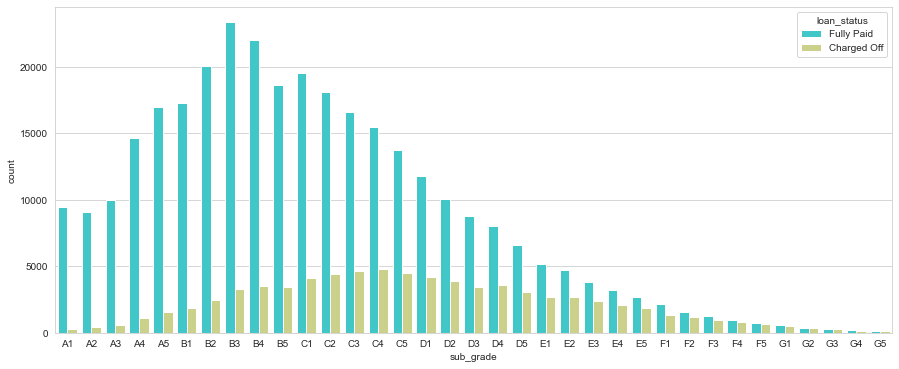

In [ ]:
# Countplot of sub_grade per loan_status. 
plt.figure(figsize=(15,6))
sns.countplot(df['sub_grade'].sort_values(), palette='rainbow',hue=df['loan_status'])

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

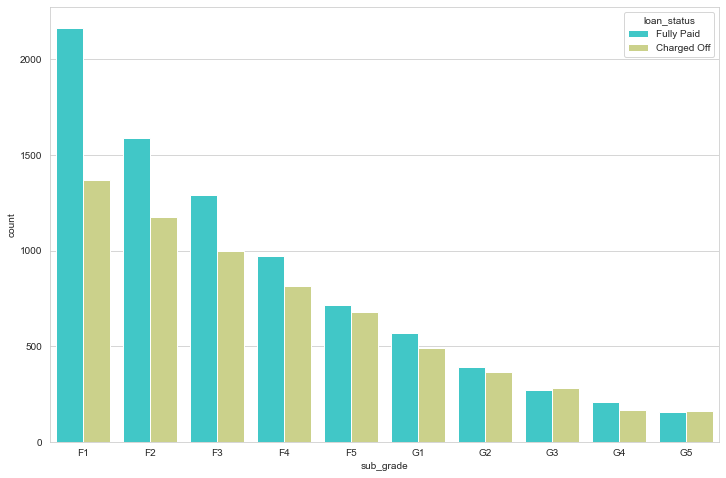

In [ ]:
# Isolating F and G and countplot just for those subgrades
f_g = df[df['sub_grade'].isin(np.sort(df['sub_grade'].unique())[-10:])]
sns.countplot(f_g['sub_grade'].sort_values(), palette='rainbow', hue=f_g['loan_status'])

# F and G sub grades often doesn't payback their loans

## **Data Preprocessing**

In this section, the focus is on making data suitable for model building.
- Data Cleaning
- Feature Engineering
- Data Transformation
  - Train Test Split
  - Normalization

### Data Cleaning

<h3>Handling Missing data</h3>

In [ ]:
# Function to check missing data after handling missing data
def check_null():
  return round(df.isna().mean()*100,2).sort_values(ascending = False)

**mort_acc**



In [ ]:
# Around 10% of mort_acc is missing
feature_info('mort_acc')

'mort_acc : Number of mortgage accounts.'

In [ ]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
31.0         2
26.0         2
32.0         2
28.0         1
34.0         1
30.0         1
Name: mort_acc, dtype: int64

In [ ]:
# Features that correlates with 'mort_acc'
df.corr()['mort_acc'].sort_values(ascending=False)

mort_acc                1.000000
total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

In [ ]:
# 'total_acc' have high correlation with 'mort_acc'
# Lookup table for mort_acc values according to total_acc
mort_acc_avg = df.groupby('total_acc')['mort_acc'].mean()
mort_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [ ]:
# Function "fill" to  'total_acc' have high correlation with 'mort_acc'
def fill_missing_data(x):
  '''
 'total_acc' have high correlation with 'mort_acc'
  Take a row and if mort_acc value is missing fill it with w.r.t total_acc,
  if mort_acc not null, no change.
  '''
  mort_account = x[0]
  total_account = x[1]
  if pd.isnull(mort_account):
    return mort_acc_avg[total_account]
  else:
    return mort_account

In [ ]:
# Fill missing values using 'fill' function
df['mort_acc'] = df[['mort_acc', 'total_acc']].apply(fill_missing_data, axis=1)
# Verify changes 
print('Number of missing values: ', df['mort_acc'].isnull().sum())
check_null()

Number of missing values:  0


emp_title               5.79
emp_length              4.62
title                   0.44
pub_rec_bankruptcies    0.14
revol_util              0.07
loan_amnt               0.00
dti                     0.00
mort_acc                0.00
application_type        0.00
initial_list_status     0.00
total_acc               0.00
revol_bal               0.00
pub_rec                 0.00
open_acc                0.00
earliest_cr_line        0.00
purpose                 0.00
term                    0.00
loan_status             0.00
issue_d                 0.00
verification_status     0.00
annual_inc              0.00
home_ownership          0.00
sub_grade               0.00
grade                   0.00
installment             0.00
int_rate                0.00
address                 0.00
dtype: float64

**emp_title**

In [ ]:
print(feature_info('emp_title'),'\n')
print('No. of unique job titles : ', df['emp_title'].nunique())
# Too many unique job titles to convert in to a dummy variable feature. 
# Dropping "emp_title"
df.drop('emp_title',axis=1, inplace=True)
check_null()

emp_title : The job title supplied by the Borrower when applying for the loan.* 

No. of unique job titles :  173105


emp_length              4.62
title                   0.44
pub_rec_bankruptcies    0.14
revol_util              0.07
dti                     0.00
mort_acc                0.00
application_type        0.00
initial_list_status     0.00
total_acc               0.00
revol_bal               0.00
pub_rec                 0.00
open_acc                0.00
earliest_cr_line        0.00
loan_amnt               0.00
term                    0.00
purpose                 0.00
loan_status             0.00
issue_d                 0.00
verification_status     0.00
annual_inc              0.00
home_ownership          0.00
sub_grade               0.00
grade                   0.00
installment             0.00
int_rate                0.00
address                 0.00
dtype: float64

**emp_length**

In [ ]:
print(feature_info('emp_length'),'\n')
print('Different Employment lengths: \n', sorted(df['emp_length'].dropna().unique()))

emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.  

Different Employment lengths: 
 ['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '< 1 year']


<AxesSubplot:xlabel='emp_length', ylabel='count'>

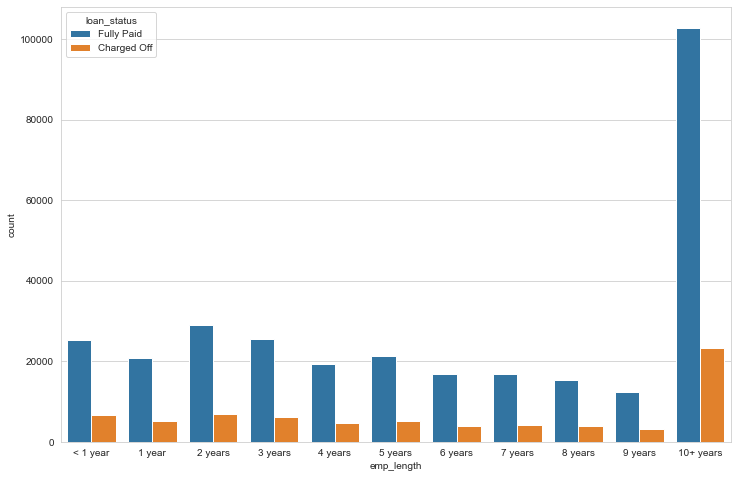

In [ ]:
# Countplot of 'emp_lenth' with given order "emp_length_order"
emp_length_order = [ '< 1 year','1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
sns.countplot(df['emp_length'], order=emp_length_order, hue=df['loan_status'])

# The fully paid and Charged Off ratio looks same all emp_lengths

In [ ]:
# Charged Off emp loan_status w.r.t emp_length 
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
print(emp_co)

# Fully Paid emp loan_status w.r.t emp_length 
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']
print('\n',emp_fp)

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

 emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64


In [ ]:
# Charged off loan_status Ratio w.r.t emp_length 
print('Charged off loan_status Ratio w.r.t emp_length: \n')
emp_len = emp_co/(emp_fp+emp_co)
print(emp_len)

Charged off loan_status Ratio w.r.t emp_length: 

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64


title                   0.44
pub_rec_bankruptcies    0.14
revol_util              0.07
dti                     0.00
mort_acc                0.00
application_type        0.00
initial_list_status     0.00
total_acc               0.00
revol_bal               0.00
pub_rec                 0.00
open_acc                0.00
earliest_cr_line        0.00
loan_amnt               0.00
term                    0.00
purpose                 0.00
loan_status             0.00
issue_d                 0.00
verification_status     0.00
annual_inc              0.00
home_ownership          0.00
sub_grade               0.00
grade                   0.00
installment             0.00
int_rate                0.00
address                 0.00
dtype: float64

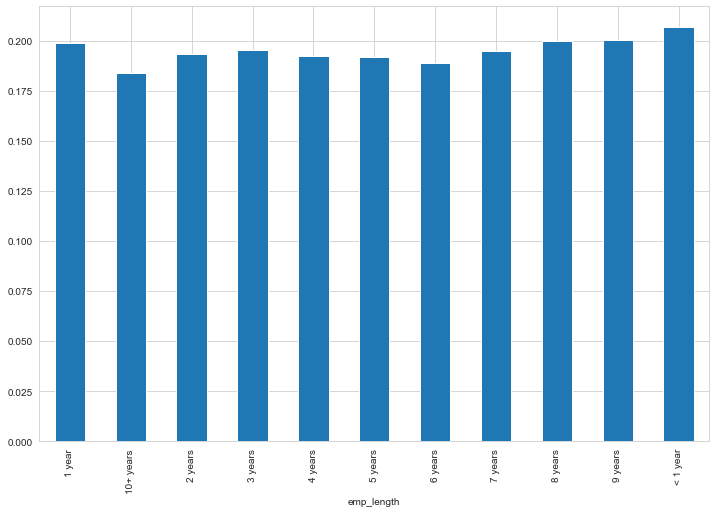

In [ ]:
# Charge off rates are similar across all employment lengths
emp_len.plot(kind='bar')
# Dropping the emp_length column as it doen't contain much information
df.drop('emp_length',axis=1, inplace=True)
check_null()

**title**

In [ ]:
print(feature_info('title'),'\n')

print('No. of different titles: ', df['title'].dropna().nunique())
print('\nDifferent titles:\n',df['title'].dropna().value_counts())

# 48817 different titles to convert in to dummies
# Dropping title feature
df.drop('title',axis=1, inplace=True) 
check_null()

title : The loan title provided by the borrower 

No. of different titles:  48817

Different titles:
 Debt consolidation                          152472
Credit card refinancing                      51487
Home improvement                             15264
Other                                        12930
Debt Consolidation                           11608
                                             ...  
Need Help To Payoff 401(k) Home Loan             1
1990 BMW M3 investment financing                 1
Paypal                                           1
new summer                                       1
Lowrey Organ & Wellness Ctr. For Seniors         1
Name: title, Length: 48817, dtype: int64


pub_rec_bankruptcies    0.14
revol_util              0.07
loan_amnt               0.00
term                    0.00
mort_acc                0.00
application_type        0.00
initial_list_status     0.00
total_acc               0.00
revol_bal               0.00
pub_rec                 0.00
open_acc                0.00
earliest_cr_line        0.00
dti                     0.00
purpose                 0.00
loan_status             0.00
issue_d                 0.00
verification_status     0.00
annual_inc              0.00
home_ownership          0.00
sub_grade               0.00
grade                   0.00
installment             0.00
int_rate                0.00
address                 0.00
dtype: float64

**Other Features**

In [ ]:
# pub_rec_bankruptcies and revol_util have only 0.14% and 0.07 % of missing values respectively

print(feature_info('pub_rec_bankruptcies'),'\n')
print('Different values of pub_rec_bankruptcies: ', df['pub_rec_bankruptcies'].dropna().unique())
print('\npub_rec_bankruptcies counts:\n',df['pub_rec_bankruptcies'].dropna().value_counts())

pub_rec_bankruptcies : Number of public record bankruptcies 

Different values of pub_rec_bankruptcies:  [0. 1. 2. 3. 4. 5. 6. 7. 8.]

pub_rec_bankruptcies counts:
 0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64


In [ ]:
# Mean and Median values of pub_rec_bankruptcies and revol_util

print('pub_rec_bankruptcies:\n',df['pub_rec_bankruptcies'].describe())
print('\n\nrevol_util:\n',df['revol_util'].describe())

pub_rec_bankruptcies:
 count    395495.000000
mean          0.121648
std           0.356174
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: pub_rec_bankruptcies, dtype: float64


revol_util:
 count    395754.000000
mean         53.791749
std          24.452193
min           0.000000
25%          35.800000
50%          54.800000
75%          72.900000
max         892.300000
Name: revol_util, dtype: float64


In [ ]:
# Fill the missing values with median
df = df.fillna(df.median())
check_null()

loan_amnt               0.0
term                    0.0
pub_rec_bankruptcies    0.0
mort_acc                0.0
application_type        0.0
initial_list_status     0.0
total_acc               0.0
revol_util              0.0
revol_bal               0.0
pub_rec                 0.0
open_acc                0.0
earliest_cr_line        0.0
dti                     0.0
purpose                 0.0
loan_status             0.0
issue_d                 0.0
verification_status     0.0
annual_inc              0.0
home_ownership          0.0
sub_grade               0.0
grade                   0.0
installment             0.0
int_rate                0.0
address                 0.0
dtype: float64

### Feature Engineering

In [ ]:
# Get all Categorical cols of df
cat_cols = df.select_dtypes(exclude=[np.number]).columns.values
print('Categorical cols of df:',cat_cols)

Categorical cols of df: ['term' 'grade' 'sub_grade' 'home_ownership' 'verification_status'
 'issue_d' 'loan_status' 'purpose' 'earliest_cr_line'
 'initial_list_status' 'application_type' 'address']


**term**

In [ ]:
print(feature_info('term'),'\n')
print(df['term'].unique())

# Converting ' 36 months' to 36, ' 60 months' to 60
df['term'] = df['term'].map({' 36 months':36, ' 60 months':60})
df['term'].unique()

term : The number of payments on the loan. Values are in months and can be either 36 or 60. 

[' 36 months' ' 60 months']


array([36, 60], dtype=int64)

**grade** and **sub_grade**

In [ ]:
print(feature_info('grade'))
print(df['grade'].unique(),'\n')
print(feature_info('sub_grade'))
print(df['sub_grade'].unique())
# As subgrade itself cointains grades,
# dropping 'grade' feature
df.drop('grade', axis=1, inplace=True)

grade : LC assigned loan grade
['B' 'A' 'C' 'E' 'D' 'F' 'G'] 

sub_grade : LC assigned loan subgrade
['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


**home_ownership**

In [ ]:
print(feature_info('home_ownership'),'\n')
print('Unique home_ownership :',df['home_ownership'].unique(),'\n')
print('Value counts of home_ownership :\n',df['home_ownership'].value_counts())

# Merging "NONE" and "ANY" to 'OTHERS'
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')
print('Unique home_ownership :',df['home_ownership'].unique(),'\n')
print('Value counts of home_ownership :\n',df['home_ownership'].value_counts())

home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER 

Unique home_ownership : ['RENT' 'MORTGAGE' 'OWN' 'OTHER' 'NONE' 'ANY'] 

Value counts of home_ownership :
 MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64
Unique home_ownership : ['RENT' 'MORTGAGE' 'OWN' 'OTHER'] 

Value counts of home_ownership :
 MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64


**verification_status**

verification_status : Indicates if income was verified by LC, not verified, or if the income source was verified 

Unique verification_status : ['Not Verified' 'Source Verified' 'Verified'] 

Value counts of verification_status :
 Verified           139563
Source Verified    131385
Not Verified       125082
Name: verification_status, dtype: int64


<AxesSubplot:xlabel='verification_status', ylabel='count'>

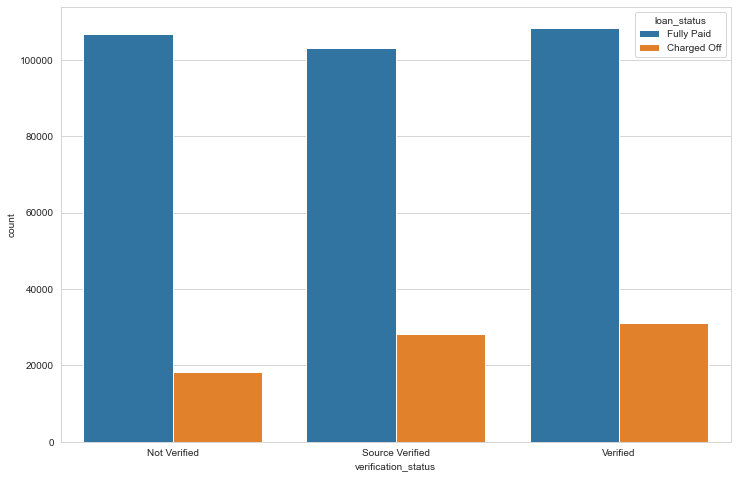

In [ ]:
print(feature_info('verification_status'),'\n')
print('Unique verification_status :',df['verification_status'].unique(),'\n')
print('Value counts of verification_status :\n',df['verification_status'].value_counts())
sns.countplot(df['verification_status'], hue=df['loan_status'])

**issue_d**

In [ ]:
# dropping this feature As we are predicting whether or not a loan would be issued when using our model
print(feature_info('issue_d'),'\n')
df.drop('issue_d', axis=1, inplace=True)

issue_d : The month which the loan was funded 



**loan_status**

In [ ]:
# Target Feature
print(feature_info('loan_status'),'\n')
print('Unique loan_status :',df['loan_status'].unique(),'\n')
print('Value counts of loan_status :\n',df['loan_status'].value_counts())

loan_status : Current status of the loan 

Unique loan_status : ['Fully Paid' 'Charged Off'] 

Value counts of loan_status :
 Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64


In [ ]:
# New 'load_repaid' column with 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".
df['loan_repaid'] = df['loan_status'].apply(lambda x:1 if x=='Fully Paid' else 0)

#Dropping the original loan_status column
df.drop(['loan_status'], axis=1, inplace=True)
print('Unique loan_repaid :',df['loan_repaid'].unique(),'\n')
print('Value counts of loan_repaid :\n',df['loan_repaid'].value_counts())

Unique loan_repaid : [1 0] 

Value counts of loan_repaid :
 1    318357
0     77673
Name: loan_repaid, dtype: int64


**purpose**

In [ ]:
print(feature_info('purpose'),'\n')
print('Unique purpose :',df['purpose'].unique(),'\n')
print('Value counts of purpose :\n',df['purpose'].value_counts())

purpose : A category provided by the borrower for the loan request.  

Unique purpose : ['vacation' 'debt_consolidation' 'credit_card' 'home_improvement'
 'small_business' 'major_purchase' 'other' 'medical' 'wedding' 'car'
 'moving' 'house' 'educational' 'renewable_energy'] 

Value counts of purpose :
 debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64


**earliest_cr_line**

<AxesSubplot:>

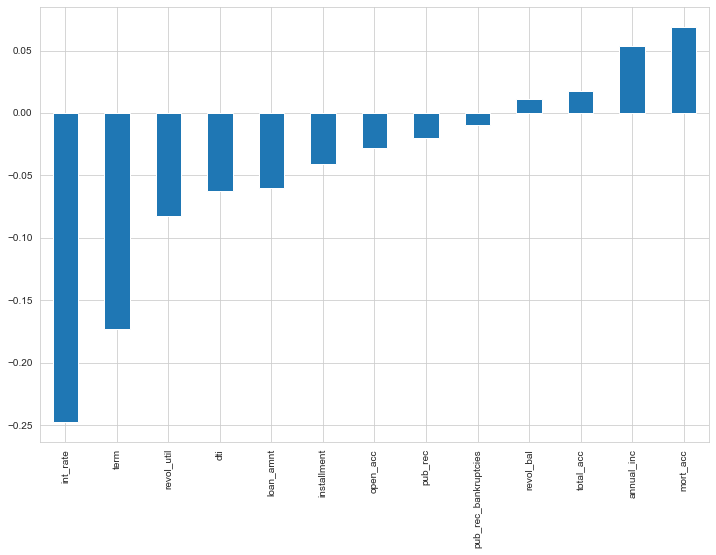

In [ ]:
# Correlation of the numeric features to the new loan_repaid column
df.corr()['loan_repaid'].sort_values()[:-1].plot.bar()

In [ ]:
print(feature_info('earliest_cr_line'),'\n')
print('Unique earliest_cr_line count :',df['earliest_cr_line'].nunique(),'\n')
print('Value counts of earliest_cr_line :\n',df['earliest_cr_line'].value_counts())

# Extracting the year from the "earliest_cr_line" feature.
# New numeric feature 'earliest_cr_year'
# dropping the original earliest_cr_line feature.

df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df.drop('earliest_cr_line', axis=1, inplace=True)

earliest_cr_line : The month the borrower's earliest reported credit line was opened 

Unique earliest_cr_line count : 684 

Value counts of earliest_cr_line :
 Oct-2000    3017
Aug-2000    2935
Oct-2001    2896
Aug-2001    2884
Nov-2000    2736
            ... 
Aug-1960       1
May-1962       1
Jan-1953       1
Jun-1955       1
Sep-1957       1
Name: earliest_cr_line, Length: 684, dtype: int64


**initial_list_status**

In [ ]:
print(feature_info('initial_list_status'),'\n')
print('Unique initial_list_status count :',df['initial_list_status'].unique(),'\n')
print('Value counts of initial_list_status :\n',df['initial_list_status'].value_counts())

initial_list_status : The initial listing status of the loan. Possible values are – W, F 

Unique initial_list_status count : ['w' 'f'] 

Value counts of initial_list_status :
 f    238066
w    157964
Name: initial_list_status, dtype: int64


**application_type**

In [ ]:
print(feature_info('application_type'),'\n')
print('Unique application_type count :',df['application_type'].unique(),'\n')
print('Value counts of application_type :\n',df['application_type'].value_counts())

application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers 

Unique application_type count : ['INDIVIDUAL' 'JOINT' 'DIRECT_PAY'] 

Value counts of application_type :
 INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64


**address**

In [ ]:
display(df['address'])
# Exctracting only zipcode from address into a new "zip_code" column

df['zip_code'] = df['address'].apply(lambda x: x[-5:])
df.drop('address', axis=1, inplace=True)
print('\n Value counts of zip_code :\n',df['zip_code'].unique())

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 396030, dtype: object


 Value counts of zip_code :
 ['22690' '05113' '00813' '11650' '30723' '70466' '29597' '48052' '86630'
 '93700']


**installment**

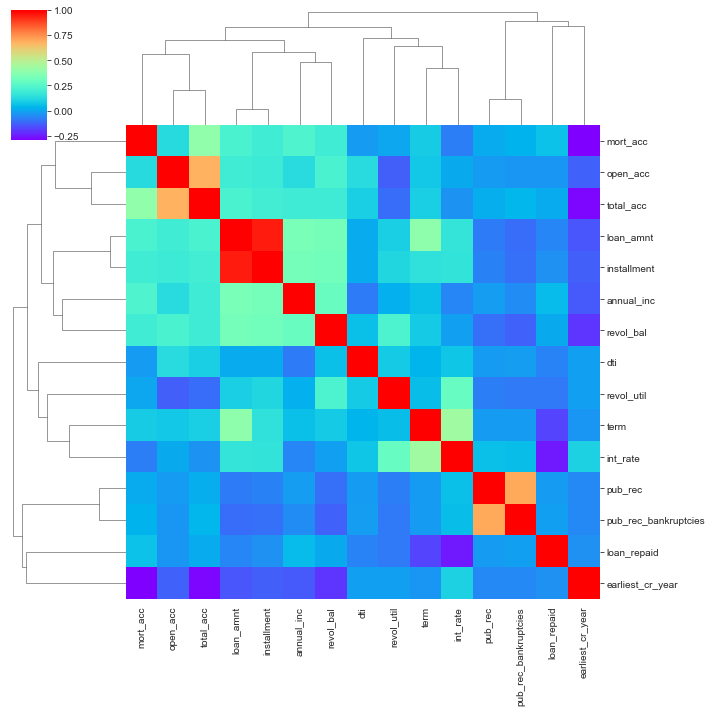

In [ ]:
sns.clustermap(df.corr(), cmap='rainbow')
df.corr()['installment'].sort_values(ascending=False)
# Dropping "installment" as it correlates above 90% with "loan_amnt"
df.drop('installment', axis=1, inplace=True)

One hot encoding

In [ ]:
# Take all categorical column of new df in cat_cols
cat_cols = df.select_dtypes(exclude=[np.number]).columns.values
print(cat_cols)

['sub_grade' 'home_ownership' 'verification_status' 'purpose'
 'initial_list_status' 'application_type' 'zip_code']


In [ ]:
# Get dummies for categorical columns
dummies = pd.get_dummies(df[cat_cols], drop_first=True)

# Drop actual categorical columns
df = df.drop(cat_cols,axis=1)

# Concatenate dummy columns with df2
df = pd.concat([df,dummies],axis=1)
df.head()

,loan_amnt,term,int_rate,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,...,application_type_JOINT,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,10000.0,36,11.44,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,...,0,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,...,0,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
print('Total rows : ', len(df)) 
print('Total columns : ', len(df.columns)) 
print('columns : \n', df.columns.values) 

Total rows :  396030
Total columns :  78
columns : 
 ['loan_amnt' 'term' 'int_rate' 'annual_inc' 'dti' 'open_acc' 'pub_rec'
 'revol_bal' 'revol_util' 'total_acc' 'mort_acc' 'pub_rec_bankruptcies'
 'loan_repaid' 'earliest_cr_year' 'sub_grade_A2' 'sub_grade_A3'
 'sub_grade_A4' 'sub_grade_A5' 'sub_grade_B1' 'sub_grade_B2'
 'sub_grade_B3' 'sub_grade_B4' 'sub_grade_B5' 'sub_grade_C1'
 'sub_grade_C2' 'sub_grade_C3' 'sub_grade_C4' 'sub_grade_C5'
 'sub_grade_D1' 'sub_grade_D2' 'sub_grade_D3' 'sub_grade_D4'
 'sub_grade_D5' 'sub_grade_E1' 'sub_grade_E2' 'sub_grade_E3'
 'sub_grade_E4' 'sub_grade_E5' 'sub_grade_F1' 'sub_grade_F2'
 'sub_grade_F3' 'sub_grade_F4' 'sub_grade_F5' 'sub_grade_G1'
 'sub_grade_G2' 'sub_grade_G3' 'sub_grade_G4' 'sub_grade_G5'
 'home_ownership_OTHER' 'home_ownership_OWN' 'home_ownership_RENT'
 'verification_status_Source Verified' 'verification_status_Verified'
 'purpose_credit_card' 'purpose_debt_consolidation' 'purpose_educational'
 'purpose_home_improvement' 'purpose_hous

<AxesSubplot:>

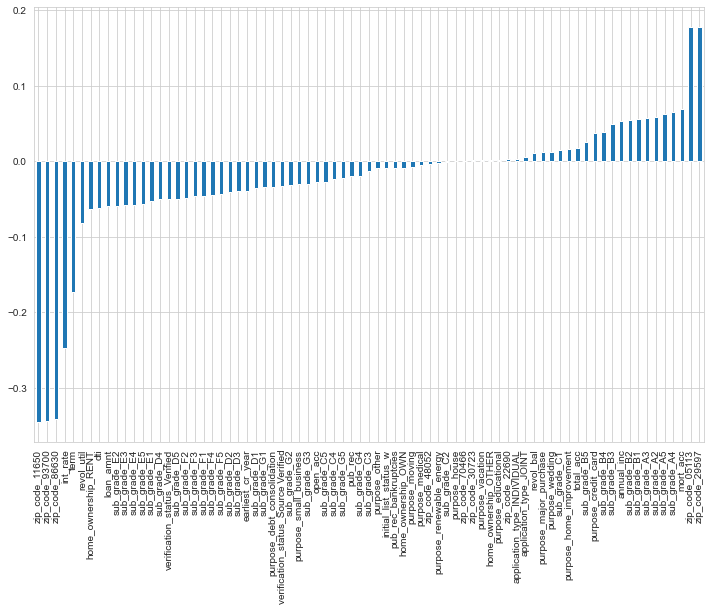

In [ ]:
df.corr()['loan_repaid'].sort_values()[:-1].plot.bar()

### Data Tranformation

- Train Test Split
- Normalization


#### Train Test Split

In [ ]:
# Excluding last three rows of df for new customer prediction

# All rows excluding last data point
X = df.iloc[:-3].drop('loan_repaid', axis=1)
y = df.iloc[:-3]['loan_repaid']

In [ ]:
X_os, y_os = SMOTE(random_state=22,n_jobs=-1,sampling_strategy=0.7).fit_resample(X, y)
print('Before sampling\ny = {} \ny_count : \n{}\n'.format(y.shape,y.value_counts()))
print('After sampling\ny= {} \ny_count : \n{}'.format(y_os.shape,y_os.value_counts()))

Before sampling
y = (396027,) 
y_count : 
1    318354
0     77673
Name: loan_repaid, dtype: int64

After sampling
y= (541201,) 
y_count : 
1    318354
0    222847
Name: loan_repaid, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=22)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_os, y_os, test_size=0.25,random_state=22)

In [ ]:
print('X_train : {} \ny_train : {}'.format(X_train.shape,y_train.shape))
print('X_test : {} \ny_test : {}'.format(X_test.shape,y_test.shape))

X_train : (297020, 77) 
y_train : (297020,)
X_test : (99007, 77) 
y_test : (99007,)


In [ ]:
print('X_train : {} \ny_train : {}'.format(X_train1.shape,y_train1.shape))
print('X_test : {} \ny_test : {}'.format(X_test1.shape,y_test1.shape))

X_train : (405900, 77) 
y_train : (405900,)
X_test : (135301, 77) 
y_test : (135301,)


# **Modeling**
---


In [ ]:
# Logistic Regression
pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(random_state=22, max_iter=1000)) 

# parameters for grid search
param_grid_lr = {'logisticregression__C': [100]}

# GRID SEARCH (using pipeline and param_grid along with cross-validation)
grid_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=5, n_jobs=-1)

# Fit Oversampled train data to grid
grid_lr.fit(X_train1, y_train1)

print('Best cross-validation score : {:.2f}\n'.format(grid_lr.best_score_))
print('Best Parameters: ', grid_lr.best_params_)

y_pred_lr = grid_lr.predict(X_test1)
print('\Predictions: ', y_pred_lr)
print('\nClassification Report: ')
print(classification_report(y_test1,y_pred_lr))
print('\nConfusion Matrix: ')
print(confusion_matrix(y_test1,y_pred_lr))

Best cross-validation score : 0.90

Best Parameters:  {'logisticregression__C': 100}
\Predictions:  [1 1 1 ... 1 1 0]

Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.80      0.87     55997
           1       0.87      0.98      0.92     79304

    accuracy                           0.90    135301
   macro avg       0.92      0.89      0.90    135301
weighted avg       0.91      0.90      0.90    135301


Confusion Matrix: 
[[44721 11276]
 [ 1683 77621]]


In [ ]:
# Random Forest Classifier
pipe_rf = make_pipeline(RandomForestClassifier(random_state=22, n_jobs=-1,class_weight='balanced',bootstrap=False,)) 

# parameters for grid search
# param_grid_rf = {'randomforestclassifier__n_estimators':[50, 100], 'randomforestclassifier__max_depth':[4,7,9], 'randomforestclassifier__criterion' :['gini','entropy']}
param_grid_rf = {'randomforestclassifier__n_estimators':[100], 'randomforestclassifier__max_depth':[9], 'randomforestclassifier__criterion' :['gini']}

# GRID SEARCH (using pipeline and param_grid along with cross-validation)
grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5, n_jobs=-1, scoring="f1" )

# Fit Oversampled train data to grid
grid_rf.fit(X_train1, y_train1)

print('Best cross-validation score : {:.2f}\n'.format(grid_rf.best_score_))
print('Best Parameters: ', grid_rf.best_params_)

y_pred_rf = grid_rf.predict(X_test1)
print('\Predictions: ', y_pred_rf)
print('\nClassification Report: ')
print(classification_report(y_test1,y_pred_rf))
print('\nConfusion Matrix: ')
print(confusion_matrix(y_test1,y_pred_rf))

Best cross-validation score : 0.83

Best Parameters:  {'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 9, 'randomforestclassifier__n_estimators': 100}
\Predictions:  [1 1 0 ... 1 0 0]

Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.85      0.81     55997
           1       0.89      0.82      0.85     79304

    accuracy                           0.83    135301
   macro avg       0.83      0.84      0.83    135301
weighted avg       0.84      0.83      0.84    135301


Confusion Matrix: 
[[47856  8141]
 [14214 65090]]


In [ ]:
# ANN Model

model = Sequential()
# Input layer
model.add(Dense(77, activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.3)) # Drop 30% of neurons randomly
# Hidden layers
model.add(Dense(38, activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Dense(19, activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the created model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Monitor the "validation_loss" and 
# when "min" value is reached during training, wait for "3" epochs and stop training
early_stop = EarlyStopping(monitor='val_loss',
                    verbose=1,
                    mode='min',
                    patience=3)
scaler = StandardScaler()
X_train_sca_smo = scaler.fit_transform(X_train1)
X_test_sca = scaler.transform(X_test1)

# Fit the model
model.fit(X_train_sca_smo,
        y_train1,
        batch_size=256,
        epochs=15,
        validation_data=(X_test_sca, y_test1),
        callbacks=[early_stop])

Epoch 1/30
1586/1586 [==============================] - 8s 4ms/step - loss: 0.2616 - accuracy: 0.8949 - val_loss: 0.2157 - val_accuracy: 0.9094
Epoch 2/30
1586/1586 [==============================] - 5s 3ms/step - loss: 0.2192 - accuracy: 0.9097 - val_loss: 0.2098 - val_accuracy: 0.9103
Epoch 3/30
1586/1586 [==============================] - 5s 3ms/step - loss: 0.2136 - accuracy: 0.9106 - val_loss: 0.2080 - val_accuracy: 0.9105
Epoch 4/30
1586/1586 [==============================] - 5s 3ms/step - loss: 0.2111 - accuracy: 0.9110 - val_loss: 0.2065 - val_accuracy: 0.9108
Epoch 5/30
1586/1586 [==============================] - 5s 3ms/step - loss: 0.2095 - accuracy: 0.9113 - val_loss: 0.2062 - val_accuracy: 0.9108
Epoch 6/30
1586/1586 [==============================] - 5s 3ms/step - loss: 0.2085 - accuracy: 0.9116 - val_loss: 0.2053 - val_accuracy: 0.9112
Epoch 7/30
1586/1586 [==============================] - 5s 3ms/step - loss: 0.2081 - accuracy: 0.9117 - val_loss: 0.2049 - val_accuracy:

Summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 77)                6006      
_________________________________________________________________
dropout (Dropout)            (None, 77)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 38)                2964      
_________________________________________________________________
dropout_1 (Dropout)          (None, 38)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 19)                741       
_________________________________________________________________
dropout_2 (Dropout)          (None, 19)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2

# **Evaluation**
---

- Predictions and Losses
- Tensor Board
- New Customer Loan Repayment Prediction

## Predictions and Losses

In [ ]:
# New dataframe "losses" with model.history.history data
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.261644,0.894925,0.215662,0.909365
1,0.219201,0.909727,0.209833,0.910304
2,0.213618,0.910564,0.208033,0.910481
3,0.211136,0.910961,0.206495,0.910814
4,0.209497,0.911261,0.206160,0.910836
5,0.208489,0.911648,0.205328,0.911168
6,0.208087,0.911656,0.204879,0.911161
7,0.207240,0.911865,0.204631,0.911191
8,0.206784,0.911897,0.204177,0.911420
9,0.206280,0.912072,0.203975,0.911457


<AxesSubplot:>

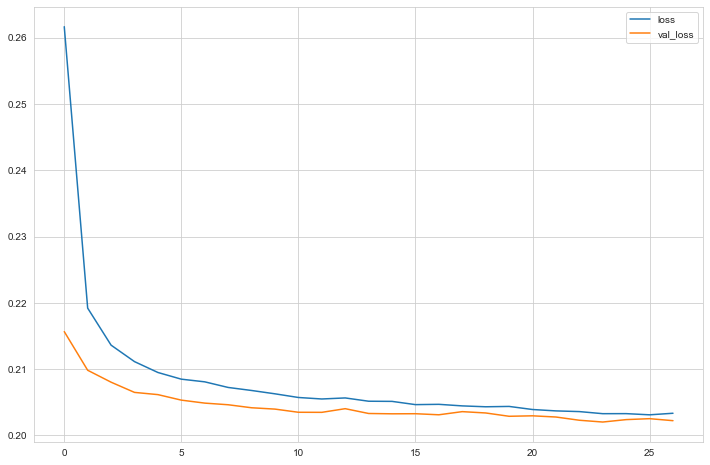

In [ ]:
# Plot training loss v/s validation loss
losses[['loss','val_loss']].plot()


<AxesSubplot:>

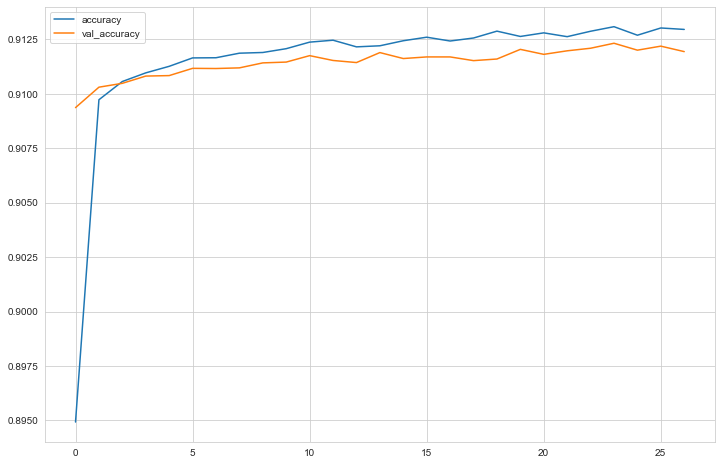

In [ ]:
# Plot training accuracy v/s validation accuracy
losses[['accuracy','val_accuracy']].plot()

In [ ]:
# Predictions on test set
y_pred_ann = model.predict_classes(X_test_sca)

print('\nClassification Report: ')
print(classification_report(y_test1,y_pred_ann))
print('\nConfusion Matrix: ')
print(confusion_matrix(y_test1,y_pred_ann))
f1 = f1_score(y_test1,y_pred_ann, labels=None, average='binary', sample_weight=None, zero_division='warn')



Classification Report: 
              precision    recall  f1-score   support

           0       0.99      0.79      0.88     55997
           1       0.87      1.00      0.93     79304

    accuracy                           0.91    135301
   macro avg       0.93      0.89      0.91    135301
weighted avg       0.92      0.91      0.91    135301


Confusion Matrix: 
[[44336 11661]
 [  254 79050]]


In [ ]:
print('\nf1_score: ', round(f1,2))


f1_score:  0.93


Satisfied with achieved accuracy.

## New Customer Loan Repayment Prediction

In [ ]:
# Training the NN on the whole dataset (X and y) to have it ready for inference.

X_sca = scaler.fit_transform(X_os)

# Creating final model
final_model = Sequential()
# Input layer
final_model.add(Dense(77, activation='relu', kernel_constraint=max_norm(3)))
final_model.add(Dropout(0.3))
# Hidden layers
final_model.add(Dense(38, activation='relu', kernel_constraint=max_norm(3)))
final_model.add(Dropout(0.2))
final_model.add(Dense(19, activation='relu', kernel_constraint=max_norm(3)))
final_model.add(Dropout(0.2))
# Output layer
final_model.add(Dense(1, activation='sigmoid'))

# Compile the created model
final_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
final_model.fit(X_sca, y_os, batch_size=256, epochs=10)

Epoch 1/10
2115/2115 [==============================] - 7s 3ms/step - loss: 0.2543 - accuracy: 0.8968
Epoch 2/10
2115/2115 [==============================] - 6s 3ms/step - loss: 0.2154 - accuracy: 0.9101
Epoch 3/10
2115/2115 [==============================] - 6s 3ms/step - loss: 0.2108 - accuracy: 0.9110
Epoch 4/10
2115/2115 [==============================] - 6s 3ms/step - loss: 0.2091 - accuracy: 0.9112
Epoch 5/10
2115/2115 [==============================] - 6s 3ms/step - loss: 0.2081 - accuracy: 0.9116
Epoch 6/10
2115/2115 [==============================] - 6s 3ms/step - loss: 0.2074 - accuracy: 0.9116
Epoch 7/10
2115/2115 [==============================] - 6s 3ms/step - loss: 0.2067 - accuracy: 0.9119
Epoch 8/10
2115/2115 [==============================] - 6s 3ms/step - loss: 0.2064 - accuracy: 0.9118
Epoch 9/10
2115/2115 [==============================] - 6s 3ms/step - loss: 0.2059 - accuracy: 0.9119
Epoch 10/10
2115/2115 [==============================] - 6s 3ms/step - loss: 0.205

Saving the Trained Model

In [ ]:
# save the model
final_model.save('loan_approval_model.h5')  
# save the scaler
dump(scaler, open('scaler.pkl', 'wb'))

In [ ]:
# Function "assess_customer"
def assess_customer(cust):

  '''
  Take new customer and reshape the values to shape that model was trained on. (1,77)
  Transform the new customer attributes using same MinMaxScaler object
  return the output based on predicted class.
  '''

  cust = cust.values.reshape(1,77)
  cust_sca = scaler.transform(cust)

  if final_model.predict_classes(cust_sca)==1:
    print ("Customer is likely to pay back the loan \nLoan can be approved")
  else:
    print ("Customer is not likely to pay back the loan \nLoan can't be approved")

In [ ]:
# Model predicted
for i in range(len(new_cust)):
  assess_customer(new_cust.iloc[i].drop('loan_repaid'))

Customer is likely to pay back the loan 
Loan can be approved
Customer is likely to pay back the loan 
Loan can be approved
Customer is not likely to pay back the loan 
Loan can't be approved


In [ ]:
# Actual
new_cust['loan_repaid']

396027    1
396028    1
396029    1
Name: loan_repaid, dtype: int64

# Inference function for Web App

In [ ]:
def access_customer_new(new_cust):

  features = np.array([[request.form['loan_amount'], request.form['term'], request.form['int_rate'], request.form['sub_grade'],
                        request.form['home_ownership'], request.form['annual_inc'], request.form['verification_status'], request.form['purpose'], 
                        request.form['dti'], request.form['open_acc'], request.form['pub_rec'], request.form['revol_bal'],
                        request.form['revol_util'], request.form['total_acc'], request.form['initial_list_status'], request.form['application_type'], 
                        request.form['mort_acc'], request.form['pub_rec_bankruptcies'], request.form['earliest_cr_year'], request.form['zip_code']
                        ]])
  
  cols = ['loan_amnt', 'term', 'int_rate', 'sub_grade', 'home_ownership',
            'annual_inc', 'verification_status', 'purpose', 'dti', 'open_acc',
            'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
            'initial_list_status', 'application_type', 'mort_acc',
            'pub_rec_bankruptcies', 'earliest_cr_year', 'zip_code']
  cat_col = ['sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type', 'zip_code']

  new_cust = pd.DataFrame(features, columns = cols)
  print(new_cust)

  dummy = pd.get_dummies(new_cust[cat_col], drop_first=True)
  new_cust = pd.concat([new_cust,dummy],axis=1).drop(cat_col,axis=1)
  new_cust = new_cust.reset_index(drop=True)

  df1 = pd.read_csv('/content/df1.csv', index_col=0).drop('loan_repaid', axis=1)
  df1, new_cust = df1.align(new_cust, axis=1, fill_value=0)
  df1_cols = df1.columns.values
  
  new_cust = new_cust[df1_cols]

  new_cust = new_cust.values.reshape(1,77)
  new_cust_sca = scaler.transform(new_cust)

  pred = final_model.predict_classes(new_cust_sca)
  
  if pred>=0.5:
    print ("Customer is likely to pay back the loan \nLoan can be approved")
  else:
    print ("Customer is not likely to pay back the loan \nLoan can't be approved")
